In [135]:
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/Users/00075868/MyCodes/AnalysisTools/')
import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)

In [136]:
snap=st.SnapshotTools('/Users/00075868/Dropbox/snapshot_025','HDF5')
halo=ht.HaloTools('/Users/00075868/Dropbox/snapshot_0025.VELOCIraptor','VELOCIraptor')
#tree=mtt.TreeTools('/Users/00075868/Dropbox/trees_L62pt5_N270.hdf5','SubFind')


In [138]:
snap.ReadSnapshot()
halo.ReadHaloCatalogue()
#tree.ReadMergerTreeCatalogue()
print(np.min(halo.GroupPos))
print(np.max(halo.GroupPos))
print(snap.BoxSize)
print(snap.HubbleParam)
print(snap.BoxSize/snap.HubbleParam)

Reading data from /Users/00075868/Dropbox/snapshot_025.hdf5
0.005315746326249617
74.2712944515815
50.0
0.6732
74.27213309566251


/Users/00075868/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


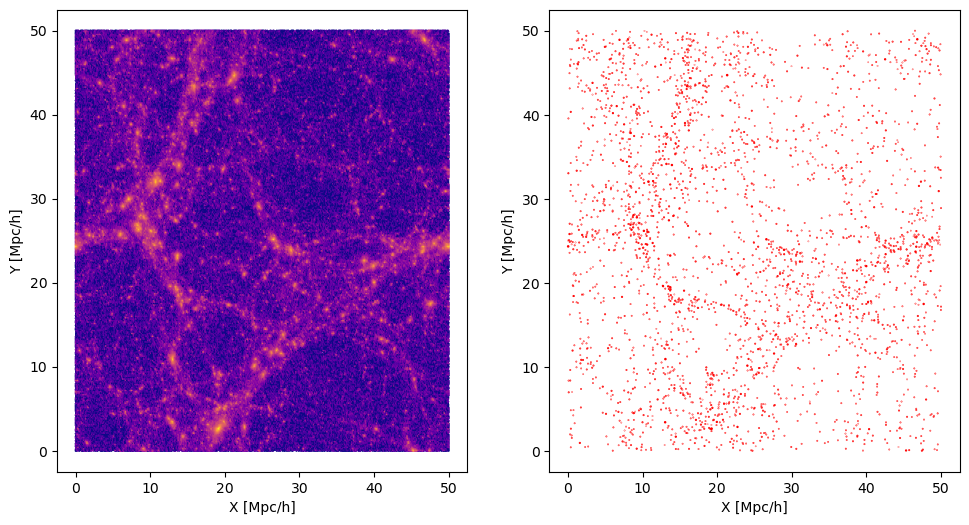

In [121]:
ipick=np.logical_and(snap.pos[:,2]<100,snap.pos[:,2]>0)
jpick=np.logical_and(halo.GroupPos[:,2]<100,halo.GroupPos[:,2]>0)
#kpick=np.logical_and(gal.pos[:,2]<100,gal.pos[:,2]>0)

fig=plt.figure(figsize=(18,6))
ax=fig.add_subplot(1,3,1)
ax.set_xlabel("X [Mpc/h]")
ax.set_ylabel("Y [Mpc/h]")
ax.hexbin(snap.pos[ipick][:,0],snap.pos[ipick][:,1],bins='log',gridsize=512,cmap='plasma')

ax=fig.add_subplot(1,3,2)
ax.set_xlabel("X [Mpc/h]")
ax.set_ylabel("Y [Mpc/h]")
ax.scatter(halo.GroupPos[jpick][:,0],halo.GroupPos[jpick][:,1],s=halo.GroupR200[jpick]/np.max(halo.GroupR200[jpick]),color="red")

# ax=fig.add_subplot(1,3,3)
# ax.set_xlabel("X [Mpc/h]")
# ax.set_ylabel("Y [Mpc/h]")
# ax.scatter(gal.pos[kpick][:,0],gal.pos[kpick][:,1],s=gal.mstar_tot[kpick]/np.max(gal.mstar_tot[kpick]),color="green")

Text(0, 0.5, '$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')

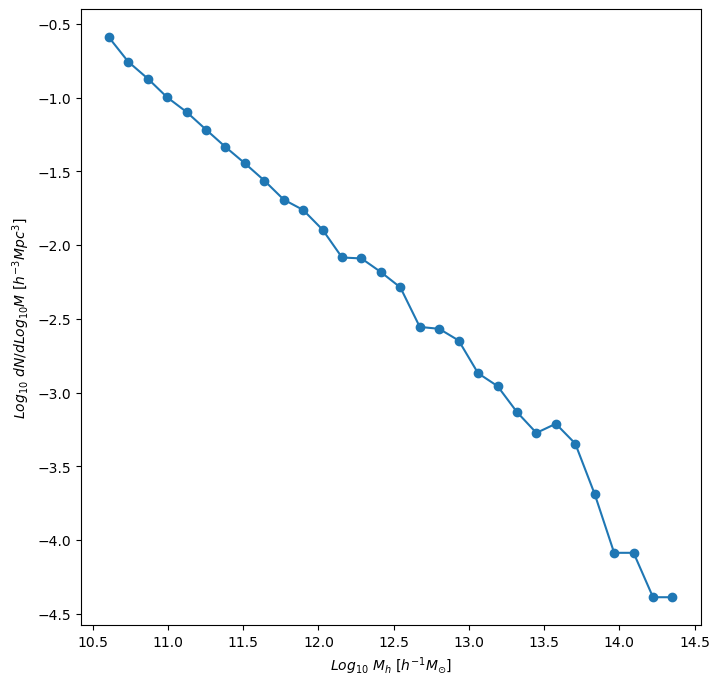

In [7]:
dlm=0.1
numbins=(np.max(np.log10(halo.GroupMass))-np.min(np.log10(halo.GroupMass)))/dlm
(num,lmbins)=np.histogram(np.log10(halo.GroupMass)+10,bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.scatter(lm,ldndlm)
ax.plot(lm,ldndlm)
ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')




/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_59979/4162368530.py:30: RuntimeWarning: divide by zero encountered in log10
  ldndlm=np.log10(num/snap.BoxSize**3/dlm)


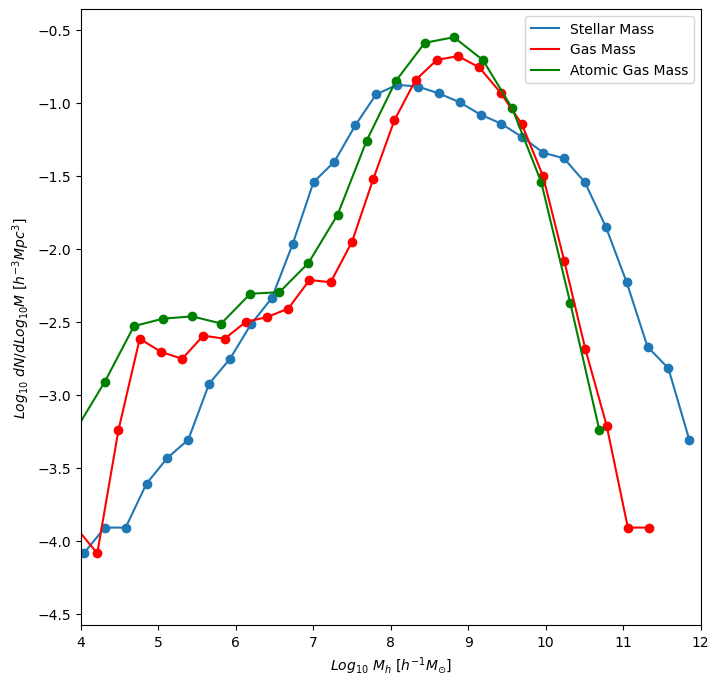

In [8]:

dlm=0.1
numbins=(np.max(np.log10(gal.mstar_tot))-np.min(np.log10(gal.mstar_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.mstar_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlim([4,12])
ax.scatter(lm,ldndlm)
ax.plot(lm,ldndlm,label='Stellar Mass')
ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')

numbins=(np.max(np.log10(gal.mgas_tot))-np.min(np.log10(gal.mgas_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.mgas_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
ax.scatter(lm,ldndlm,color='red')
ax.plot(lm,ldndlm,color='red',label='Gas Mass')

numbins=(np.max(np.log10(gal.matom_tot))-np.min(np.log10(gal.matom_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.matom_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
ax.scatter(lm,ldndlm,color='green')
ax.plot(lm,ldndlm,color='green',label='Atomic Gas Mass')

plt.legend()

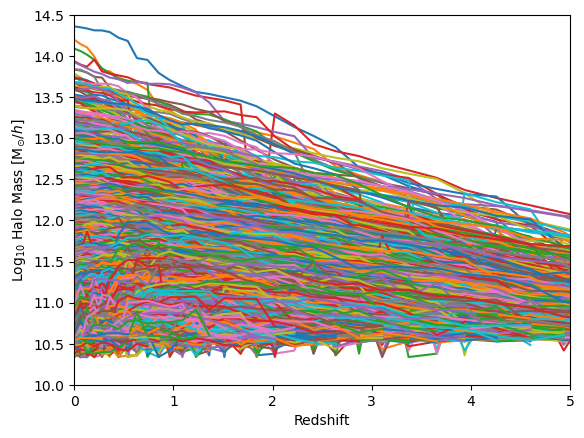

In [104]:
halo_list=np.where(halo.GroupNsubs>0)[0]
main_subhalo_list=halo.GroupFirstSub[halo_list]
plt.xlim([0,5])
plt.ylim([10,14.5])
plt.xlabel("Redshift")
plt.ylabel(r"Log$_{10}$ Halo Mass [M$_{\odot}/h$]")
formation_redshift=np.array([])
halo_mass=np.array([])
for main_subhalo_id in main_subhalo_list:
    redshift,mass,m200,group_number,subhalo_number,zform=tree.TrackMainHaloProgenitor(main_subhalo_id,64)
    if len(mass)>0:
        formation_redshift=np.append(formation_redshift,zform)
        halo_mass=np.append(halo_mass,mass[0])
        plt.plot(redshift,np.log10(mass)+10)    


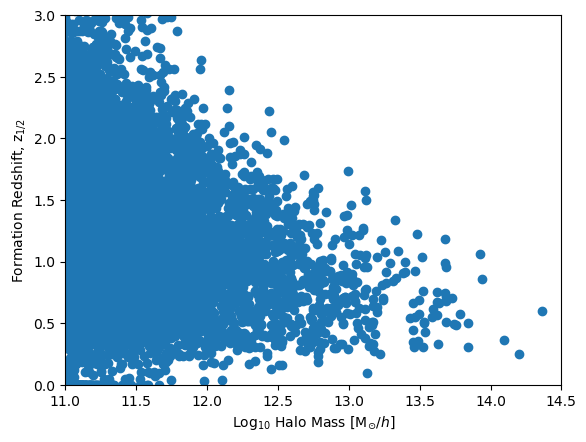

In [107]:
plt.ylim([0,3])
plt.xlim([11,14.5])
plt.ylabel(r"Formation Redshift, z$_{1/2}$")
plt.xlabel(r"Log$_{10}$ Halo Mass [M$_{\odot}/h$]")
plt.scatter(np.log10(halo_mass)+10,formation_redshift)

In [10]:
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/Users/00075868/MyCodes/AnalysisTools/')
import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)
path='/Users/00075868/CurrentWork/L210_N1536/'

In [ ]:
halo=ht.HaloTools(path+'snap_0090/'+'snap_0090.VELOCIraptor','VELOCIraptor')
halo.ReadHaloCatalogue()
haloa=ht.HaloTools(path+'snap_0090a/'+'snap_0090.VELOCIraptor','VELOCIraptor')
haloa.ReadHaloCatalogue()
halob=ht.HaloTools(path+'snap_0090b/'+'snap_0090.VELOCIraptor','VELOCIraptor')
halob.ReadHaloCatalogue()
halod=ht.HaloTools(path+'snap_0090d/'+'snap_0090.VELOCIraptor','VELOCIraptor')
halod.ReadHaloCatalogue()
halo0=ht.HaloTools(path+'snap_0199/'+'snap_0199.VELOCIraptor','VELOCIraptor')
halo0.ReadHaloCatalogue()


Reading data for 797211 groups
Data is split across 48 files
['File_id', 'Group_Size', 'Num_of_files', 'Num_of_groups', 'Number_of_substructures_in_halo', 'Offset', 'Offset_unbound', 'Parent_halo_ID', 'Total_num_of_groups']
Reading data for 797211 groups
Catalogue data is split across 48 files
Reading data for 72409555 particles in groups
Particle IDs data is split across 48 files
['File_id', 'Num_of_files', 'Num_of_particles_in_groups', 'Particle_IDs', 'Total_num_of_particles_in_all_groups']
Reading data for 5822702 particles in groups
Particle IDs data is split across 48 files
Reading data for 1070138 groups
Data is split across 48 files
['File_id', 'Group_Size', 'Num_of_files', 'Num_of_groups', 'Number_of_substructures_in_halo', 'Offset', 'Offset_unbound', 'Parent_halo_ID', 'Total_num_of_groups']
Reading data for 1070138 groups
Catalogue data is split across 48 files
Reading data for 99207899 particles in groups
Particle IDs data is split across 48 files
['File_id', 'Num_of_files', 

In [ ]:
print(np.min(halo0.GroupMass),np.max(halo0.GroupMass))

/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_68072/2704959150.py:15: RuntimeWarning: divide by zero encountered in log10
  ldndlma=np.log10(num/boxsize**3/dlm)
/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_68072/2704959150.py:41: RuntimeWarning: divide by zero encountered in log10
  ldndlmc=np.log10(num/boxsize**3/dlm)
/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_68072/2704959150.py:55: RuntimeWarning: invalid value encountered in subtract
  ax.scatter(lm,ldndlma-ldndlmc,color='blue')
/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_68072/2704959150.py:56: RuntimeWarning: invalid value encountered in subtract
  ax.plot(lm,ldndlma-ldndlmc,label='Mass_tot/Mass_FOF',color='blue')


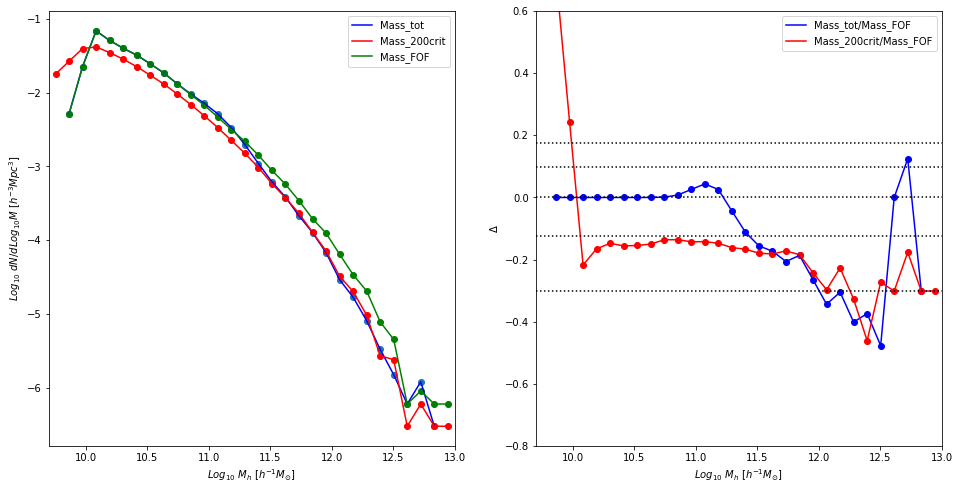

In [78]:
numbins=30
boxsize=halo.BoxSize/halo.ScaleFactor
dlm=(13-9.7)/numbins

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
ax.set_xlim([9.7,13])

mhalo=halod.GroupMass[halod.Structuretype==10]
# mhalo=halo.GroupM200[np.logical_and(halo.Structuretype==10,halo.GroupM200>0)]
(num,lmbins)=np.histogram(np.log10(mhalo)+10,bins=numbins,range=[9.7,13.])
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlma=np.log10(num/boxsize**3/dlm)

ax.scatter(lm,ldndlma)
ax.plot(lm,ldndlma,label='Mass_tot',color='blue')
# ax.plot(lm,ldndlma,label='FOFTYPE3,Bnd0',color='blue')

# mhalo=halo.GroupM200[np.logical_and(halo.Structuretype==10,halo.GroupM200>0)]
# mhalo=halo.GroupMFOF[haloa.Structuretype==10]
mhalo=halod.GroupM200[np.logical_and(halod.Structuretype==10,halod.GroupM200>0)]
(num,lmbins)=np.histogram(np.log10(mhalo)+10,bins=numbins,range=[9.7,13.])
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlmb=np.log10(num/boxsize**3/dlm)

ax.scatter(lm,ldndlmb,color='red')
ax.plot(lm,ldndlmb,color='red',label='Mass_200crit')
# ax.plot(lm,ldndlmb,color='red',label='FOFTYPE5,Bnd0')

# mhalo=halo.GroupMFOF[halo.Structuretype==10]
mhalo=halod.GroupMFOF[halod.Structuretype==10]
# mhalo=halob.GroupM200[np.logical_and(halob.Structuretype==10,halob.GroupM200>0)]
(num,lmbins)=np.histogram(np.log10(mhalo)+10,bins=numbins,range=[9.7,13.])
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlmc=np.log10(num/boxsize**3/dlm)

ax.scatter(lm,ldndlmc,color='green')
ax.plot(lm,ldndlmc,color='green',label='Mass_FOF')
# ax.plot(lm,ldndlmc,color='green',label='FOFTYPE5,Bnd1')

ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')
ax.legend()

ax=fig.add_subplot(1,2,2)
ax.set_xlim([9.7,13])
ax.set_ylim([-0.8,0.6])

ax.scatter(lm,ldndlma-ldndlmc,color='blue')
ax.plot(lm,ldndlma-ldndlmc,label='Mass_tot/Mass_FOF',color='blue')
# ax.plot(lm,ldndlma-ldndlmc,label='FOFTYPE3,Bnd0/FOFTYPE5,Bnd1',color='blue')

ax.scatter(lm,ldndlmb-ldndlmc,color='red')
ax.plot(lm,ldndlmb-ldndlmc,label='Mass_200crit/Mass_FOF',color='red')
# ax.plot(lm,ldndlmb-ldndlmc,label='FOFTYPE5,Bnd0/FOFTYPE5,Bnd1',color='red')

ax.axhline(0,linestyle=":",color='black')
ax.axhline(np.log10(1.5),linestyle=":",color='black')
ax.axhline(np.log10(0.5),linestyle=":",color='black')
ax.axhline(np.log10(1.25),linestyle=":",color='black')
ax.axhline(np.log10(0.75),linestyle=":",color='black')


ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$\Delta$')
ax.legend()

plt.savefig(path+'mass_functions_foftype5_bound2_z5pt.6.png',dpi=300)


In [56]:
?plt.hist